<a href="https://colab.research.google.com/github/eunzzae/Study_DL/blob/main/DL_pytorch_Loss_Function_%EC%A0%95%EB%A6%AC_231101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

# PyTorch 실습 - Tensor 조작  
https://dk-kang.tistory.com/entry/PyTorch-%EC%8B%A4%EC%8A%B5-Tensor-%EC%A1%B0%EC%9E%91%ED%95%98%EA%B8%B01

# Loss Function
* 비용함수(Cost Function)이라고도 함


* 아래 t는 총 10개의 값으로, 어떤 입력값이 0~9중 어떤 값인지를 나타내는 확률값
* y는 예측된 데이터

In [2]:
t = [0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0]

In [3]:
y = [0.01, 0.01, 0.1, 0.3, 0.33, 0.04, 0.02, 0.05, 0.01, 0.1]

## 평균 제곱 오차(Mean Squared Error, MSE)

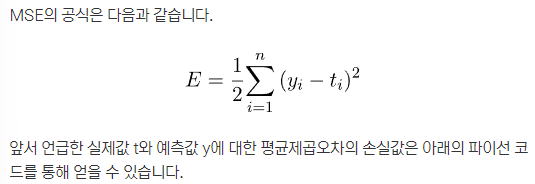

In [4]:
def MSE(y, t):
    return 0.5 * np.sum((y-t)**2)

t = np.array([0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0])
y0 = [0.01, 0.01, 0.1, 0.3, 0.33, 0.04, 0.02, 0.05, 0.01, 0.1]
y1 = np.array([0.3, 0.01, 0.1, 0.01, 0.04, 0.02, 0.05, 0.33, 0.01, 0.1])

print(MSE(t, y0)) # 0.04685
print(MSE(t, y1)) # 0.33685

0.04685
0.33685


In [5]:
y = [0.3, 0.01, 0.1, 0.01, 0.04, 0.02, 0.05, 0.33, 0.01, 0.1]

교차 엔트로피 오차(Cross Entropy Error, CEE)

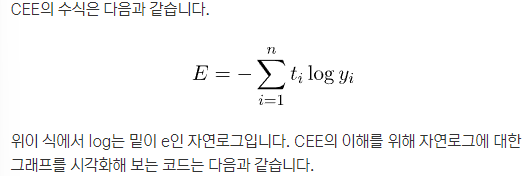

* 가로축은 정답일 확률, y축은 손실값에 -1을 곱한 값.  
* 가로축 값이 1, 즉 정답 확률이 100%일 떄 손실값은 0이 되고, 정답의 확률이 낮아질수록 손실값은 무한대로 커짐

<ipython-input-6-483afdc454e6>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


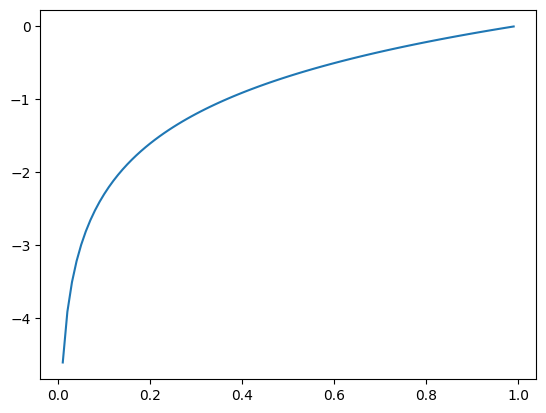

In [6]:
x = np.arange(0, 1, 0.01)
y = np.log(x)

plt.plot(x, y)
plt.show()

In [7]:
def CEE(y, t):
    delta = 1e-10
    return -np.sum(t*np.log(y+delta))

t = np.array([0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0])
y0 = [0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0]
y1 = [0.01, 0.01, 0.1, 0.3, 0.33, 0.04, 0.02, 0.05, 0.01, 0.1]
y2 = np.array([0.3, 0.01, 0.1, 0.01, 0.04, 0.02, 0.05, 0.33, 0.01, 0.1])

print(CEE(t, y0)) # 0.6931471803599453
print(CEE(t, y1)) # 8.265472039806522
print(CEE(t, y2)) # 21.21844021456322

0.6931471803599453
8.265472039806522
21.21844021456322


# 다중분류를 위한 대표적인 손실함수


## nn.NLLLoss

In [8]:
def NLLLoss(logs, targets):
    out = torch.zeros_like(targets, dtype=torch.float)
    for i in range(len(targets)):
        out[i] = logs[i][targets[i]]
    return -out.sum()/len(out)

In [13]:
x = torch.Tensor([[0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]])
y = torch.LongTensor([1])

# Case 1
cross_entropy_loss = torch.nn.CrossEntropyLoss()
print(cross_entropy_loss(x, y)) # tensor(2.1438)

# Case 2
log_softmax = torch.nn.LogSoftmax(dim=1)
x_log = log_softmax(x)
print(NLLLoss(x_log, y)) # tensor(2.1438)

# Case 3
nll_loss = torch.nn.NLLLoss()
print(nll_loss(x_log, y)) # tensor(2.1438)

tensor(2.1438)
tensor(2.1438)
tensor(2.1438)


## torch.nn.CrossEntropyLoss

* 실제 레이블 값(앞에 언급한 y 또는 class)은 1일 때 손실값을 구하는 코드

In [16]:
output = torch.Tensor([[0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]])
target = torch.LongTensor([1])

criterion = nn.CrossEntropyLoss()
loss = criterion(output, target)
print(loss) # tensor(2.1438)

tensor(2.1438)


* nn.CrossEntroyLoss를 사용하지 않고 직접 손실값 계산

In [17]:
output = [0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]
target = [1]
loss = np.log(sum(np.exp(output))) - output[target[0]]
print(loss) # 2.143818427948945

2.143818427948945


* 손실값이 필요할 때는 신경망의 학습인데, 학습에서 데이터는 GPU 자원을 최대한 활용하기 위해 배치 단위로 처리됨   
* 즉, 앞서 언급한 것처럼 1개 단위가 아닌 2개 이상의 데이터가 한꺼번에 들어옴.  
* 배치 처리에 대한 손실값은 배치를 구성하는 각 데이터의 손실값들의 평균

In [19]:
output = torch.Tensor(
    [
        [0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544],
        [0.9457, 0.0195, 0.9846, 0.3231, 0.1605, 0.3143, 0.9508, 0.2762, 0.7276, 0.4332]
    ]
)
target = torch.LongTensor([1, 5])

criterion = nn.CrossEntropyLoss()
loss = criterion(output, target)
print(loss) # tensor(2.3519)

tensor(2.3519)


In [20]:
output = [0.8982, 0.805, 0.6393, 0.9983, 0.5731, 0.0469, 0.556, 0.1476, 0.8404, 0.5544]
target = [1]
loss1 = np.log(sum(np.exp(output))) - output[target[0]]

output = [0.9457, 0.0195, 0.9846, 0.3231, 0.1605, 0.3143, 0.9508, 0.2762, 0.7276, 0.4332]
target = [5]
loss2 = np.log(sum(np.exp(output))) - output[target[0]]

print((loss1 + loss2)/2) # 2.351937720511233

2.351937720511233
